In [95]:
# make the following code support python2 and python3
from __future__ import division, print_function, unicode_literals

# check if the version of python is 3.5 or above
import sys
assert sys.version_info >= (3, 5)

# check if the version of sklearn is 0.20 or above
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os 

# every result after running is same with the result of the notebook
np.random.seed(42) 

# make the image of matplotlib better
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# set the path of saving the image
PROJECT_ROOT_DIR = "."
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    '''
    run to save image automatically
    
    :param fig_id: image name
    :param tight_layout: if it is ture，adjust the axes on the canvas automatically
    '''
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# ignore nonsense wannings
import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning, module='sklearn',  lineno=196)

In [96]:
df = pd.read_excel("Test_2.xlsx")

In [97]:
# data sets that don't contain true classification information
X = df.drop("TRUE VALUE", axis=1)
# Columns that contain true classification information
labels = df["TRUE VALUE"]
X

,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %)
0,47.60400,2.85800,5.74900,0.06200,7.02400,0.08700,12.62500,22.91600,0.32800,0.207900,6.174956e-02
1,51.78800,1.16600,2.55700,0.47500,6.80100,0.14500,14.76200,21.74300,0.32700,0.080071,1.488074e-02
2,46.56100,3.10900,6.13900,0.14500,6.91400,0.03700,12.47800,23.11200,0.62000,0.238984,2.320397e-02
3,46.34400,3.17000,7.77600,0.01400,6.84200,0.06800,11.68800,23.06700,0.57400,0.258931,4.970253e-02
4,50.18000,1.96500,3.29400,0.10600,5.72900,0.06300,13.60300,23.62600,0.54000,0.121500,1.933272e-02
5,51.29200,0.98200,3.57300,0.60200,7.12100,0.10900,16.06400,19.34900,0.31200,0.101795,1.208946e-02
6,47.87100,2.55600,4.50300,0.01200,6.98700,0.06000,12.61100,23.63300,0.51000,0.183700,3.454924e-02
7,52.85500,1.03500,1.52300,0.94700,3.67300,0.06900,15.87000,23.19800,0.37100,0.055883,3.597478e-03
8,48.45500,1.85100,5.68400,0.40800,6.66800,0.07100,14.51400,21.55100,0.25900,0.192407,1.497884e-02
9,53.58000,0.66000,1.77000,0.24000,5.12000,0.06200,16.64000,21.89000,0.22000,0.044886,5.500000e-02


In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 11 columns):
SiO2 (wt. %)     2272 non-null float64
TiO2 (wt. %)     2272 non-null float64
Al2O3 (wt. %)    2272 non-null float64
Cr2O3 (wt. %)    2272 non-null float64
FeO (wt. %)      2272 non-null float64
MnO (wt. %)      2272 non-null float64
MgO (wt. %)      2272 non-null float64
CaO (wt. %)      2272 non-null float64
Na2O  (wt. %)    2272 non-null float64
IV (Al)          2272 non-null float64
H2O (wt. %)      2272 non-null float64
dtypes: float64(11)
memory usage: 195.4 KB


In [99]:
# true classification information of the original data sets
tag = list(np.unique(labels))
tag

[-1, 0, 1]

In [100]:
from sklearn.preprocessing import StandardScaler

# data need to be standardized before dimension reduction
scaler = StandardScaler()
X_processed = pd.DataFrame(scaler.fit_transform(X))

# normal PCA（linear projection）

In [101]:
from sklearn.decomposition import PCA

# PCA assumes that the origin is centered, the data set is centralized automatically
pca1 = PCA(n_components=2)
X_reduced1 = pca1.fit_transform(X_processed)

In [102]:
# pprincipal component's weight coefficient, can obtain the expression of principal component in characteristic space
pca1.components_

array([[-0.42113472,  0.41548467,  0.36557801, -0.15419825,  0.06432417,
        -0.12771227, -0.40822211,  0.24756898,  0.24712526,  0.41062427,
         0.12052699],
       [-0.03741971, -0.00905855,  0.04400909, -0.30989707,  0.64611524,
         0.52494983, -0.11020771, -0.3804949 ,  0.11273722, -0.01373595,
        -0.19413145]])

In [103]:
# check the ratio of the variance of the data set on the principal component axis (variance interpretation proportion)
pca1.explained_variance_ratio_

array([0.45075653, 0.18692661])

In [104]:
# missing variance interpretation proportion
1 - pca1.explained_variance_ratio_.sum()

0.36231686654138584

In [105]:
# the projection of a data set onto a hyperplane that is defined by the principal component，2272 x 2
X_reduced1

array([[ 3.9380202 , -0.4596334 ],
       [-1.49280185,  0.05266333],
       [ 5.06457565, -0.44515568],
       ...,
       [-2.88009113,  1.95107869],
       [-3.12958423,  1.61244563],
       [-3.75394313,  2.89601684]])

Saving figure 2D_PCA


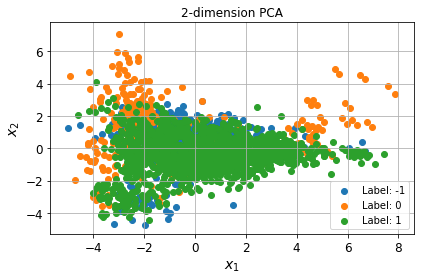

In [106]:
import matplotlib.pyplot as plt

plt.figure(1)

legend = []
# Draw a data point projection plot that is reduced to a two-dimensional plane using normal PCA
for i, label in enumerate(tag):
    plt.scatter(X_reduced1[:, 0][labels==label], X_reduced1[:, 1][labels==label])
    legend.append("Label: {}".format(label))
plt.legend(legend)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("2-dimension PCA")
plt.grid()
save_fig("2D_PCA")

In [107]:
# restore the original data set, that is, reconstruct data
X_recovered = pca1.inverse_transform(X_reduced1)

In [108]:
X_recovered.shape

(2272, 11)

In [109]:
# Compare the original data set with the recovered data set after dimension reduction，False indicates that these are different, that is, recovered data set losed data
np.allclose(X_recovered, X_processed)

False

In [110]:
from sklearn.metrics import mean_squared_error

# square distance between reconstructed data and the original data
mean_squared_error(X_recovered, X_processed)

0.36231686654138556

In [111]:
# don't set the number of dimensions to be reduced, that is, to find all principal component axes which exist in the feature space
pca2 = PCA()
pca2.fit(X_processed)
# variance interpretation proportion on each principal component axis
pca2.explained_variance_ratio_

array([4.50756528e-01, 1.86926605e-01, 1.25096888e-01, 9.18287741e-02,
       5.77389814e-02, 4.20165705e-02, 2.37266449e-02, 1.23718980e-02,
       6.90309149e-03, 2.62719666e-03, 6.82109354e-06])

In [112]:
cumsum = np.cumsum(pca2.explained_variance_ratio_)
# calculate the minimum dimension required when the variance interpretation proportion is retained at 95 %
d = np.argmax(cumsum>=0.95) + 1
d

6

# 增量PCA

In [113]:
from sklearn.decomposition import IncrementalPCA

# for large training sets, the data can be done IPCA in batched
n_batches = 100
inc_pca = IncrementalPCA(n_components=2)
for X_batch in np.array_split(X_processed, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced2 = inc_pca.transform(X_processed)

In [114]:
# compare the mean value of the training set used for PCA and INC_PCA in each dimension and see if they are equal
np.allclose(pca1.mean_, inc_pca.mean_)

True

In [115]:
# compare the dimensionless data of PCA and INC_PCA and see if they are same
np.allclose(X_reduced1, X_reduced2)

False

In [116]:
# the time required to test the dimension reduction of incremental PCA
%timeit IncrementalPCA(n_components=5, batch_size=100).fit(X_processed)

8.96 ms ± 394 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [117]:
# the time required to test the dimension reduction of ordinary PCA
%timeit PCA(n_components=5).fit(X_processed)

2.94 ms ± 46.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [118]:
# the time required to test the dimension reduction of random PCA
%timeit PCA(n_components=5, svd_solver="randomized", random_state=42)

1.31 µs ± 17.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# PCA kernel（non-linear projection）

In [119]:
from sklearn.decomposition import KernelPCA

# call the PCA with RBF kernel for nonlinear projection
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced3 = rbf_pca.fit_transform(X_processed)

In [120]:
# reduced to two dimensional data set
X_reduced3

array([[ 0.58757136,  0.16569638],
       [-0.35782739, -0.05839641],
       [ 0.66270486,  0.13528767],
       ...,
       [-0.48576459, -0.20791339],
       [-0.50659185, -0.15046424],
       [-0.44787899, -0.16387586]])

Saving figure kernel_pca_plot


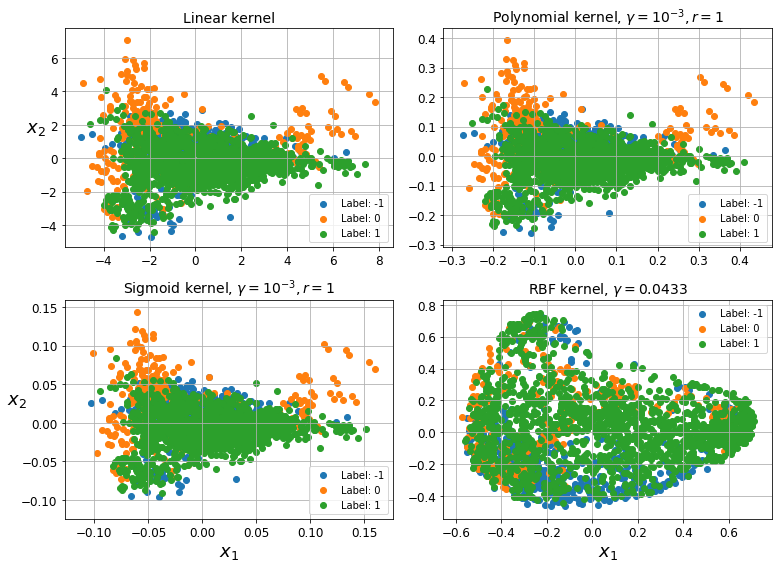

In [121]:
import matplotlib.pyplot as plt

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
poly_pca = KernelPCA(n_components=2, kernel="poly", gamma=0.001, coef0=1, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

model = [(221, lin_pca, "Linear kernel"), 
         (222, poly_pca, "Polynomial kernel, $\gamma=10^{-3}, r=1$"),
         (223, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$"), 
         (224, rbf_pca, "RBF kernel, $\gamma=0.0433$")]

def plot_2D_reduced(model, X, labels, tag, fig_name=True):
    """
    2D mapping of data points using dimensionality reduction method
    
    :param model: dimension reduction algorithm
    :param X: data sets only contain eigenvalues
    :param labels: data sets only contain label values
    :param tag: true category tag type
    :param fig_name: figure name
    """
    
    plt.figure(figsize=(11, 8))
    legend = []
    for subplot, pca, title in model:
        X_reduced = pca.fit_transform(X)
        plt.subplot(subplot)
        plt.title(title, fontsize=14)
        for i, label in enumerate(tag):
            plt.scatter(X_reduced[:, 0][labels==label], X_reduced[:, 1][labels==label])
            legend.append("Label: {}".format(label))
        if subplot == 221 or subplot == 223:
            plt.ylabel("$x_2$", fontsize=18, rotation=0)
        if subplot == 223 or subplot == 224:
            plt.xlabel("$x_1$", fontsize=18)
        plt.grid(True)
        plt.legend(legend)
    save_fig(fig_name)
    plt.show()

plot_2D_reduced(model, X_processed, labels, tag, fig_name="kernel_pca_plot")

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# pipeline first reduct dimension then classificate（can be changed to regression model）
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="liblinear", multi_class="auto")),
    ])

# parameters of PCA kernels
param_grid = {
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid", "linear", "poly"],
        "kpca__coef0": np.linspace(0, 1, 10)
    }

# look for optimal parameters automatically, and the score is the accuracy of the classification
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
grid_search.fit(X_processed, labels)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   31.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                 

In [123]:
# the optimal model
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('kpca',
                 KernelPCA(alpha=1.0, coef0=0.4444444444444444, copy_X=True,
                           degree=3, eigen_solver='auto',
                           fit_inverse_transform=False,
                           gamma=0.04777777777777778, kernel='poly',
                           kernel_params=None, max_iter=None, n_components=2,
                           n_jobs=None, random_state=None,
                           remove_zero_eig=False, tol=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    

In [124]:
# parameters of the optimal model
grid_search.best_params_

{'kpca__coef0': 0.4444444444444444,
 'kpca__gamma': 0.04777777777777778,
 'kpca__kernel': 'poly'}

In [125]:
# optimal model score
grid_search.best_score_

0.6822183098591549

In [126]:
# dimensionality reduction using the optimal model
lin_pca_new = KernelPCA(n_components=2, kernel="linear", gamma=0.03, coef0=0, fit_inverse_transform=True)
X_reduced_new = lin_pca_new.fit_transform(X_processed)
# reconstruct pre-image data，only if fit_inverse_transform=True，inverse_transform method can be used
X_preimage = lin_pca_new.inverse_transform(X_reduced_new)

In [127]:
X_preimage.shape

(2272, 11)

In [128]:
from sklearn.metrics import mean_squared_error

# the square distance between the image data before reconstruction and the original data
mean_squared_error(X_processed, X_preimage)

0.36231687865393836

# manifold learning（nonlinear dimension reduction）

Saving figure manifold_plot


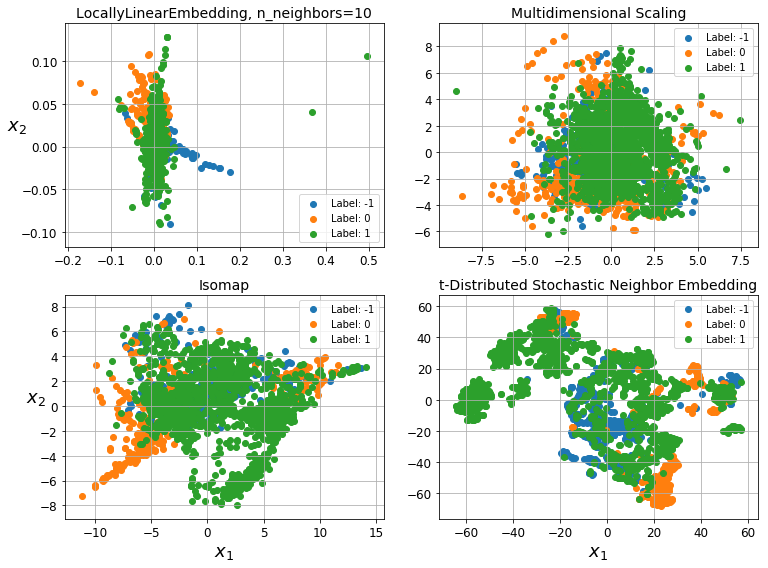

In [129]:
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE, MDS

# four common manifold learning algorithms
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
mds = MDS(n_components=2, random_state=42)
isomap = Isomap(n_components=2)
tsne = TSNE(n_components=2, random_state=42)

model_manifold = [(221, lle, "LocallyLinearEmbedding, n_neighbors=10"), 
                  (222, mds, "Multidimensional Scaling"),
                  (223, isomap, "Isomap"), 
                  (224, tsne, "t-Distributed Stochastic Neighbor Embedding")]

plot_2D_reduced(model_manifold, X_processed, labels, tag, fig_name="manifold_plot")